# Machine Learning Starter Kit

#### This notebook will aim to provide a general introduction to some of the most common machine learning algorithms in python. I've performed all of these algorithms in R within my coursework in Bay Path University's Master of Applied Data Science, now I am interested in implementing them using python.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Background

#### This code will primarily focus on Supervised Learning for now, so what is Supervised Learning? The quick and dirty answer - Supervised Learning is when the model is being trained on 'labelled' data or data which have both input and output parameters. Essentially all that means is that we know the 'answers' for our training data and the model we create will do its best to recreate these 'answers' such that when we provide new data we can have a certain level of confidence that our model correctly predicts the output parameter for this new data.

#### Rather than use the typical Iris data set we'll be using PalmerPenguins (you can find it here: https://github.com/allisonhorst/palmerpenguins) as a nice alternative to a data set that is mired in controversy that is beyond the scope of this post.

## Let's Load the Data and Visualize

In [2]:
df = pd.read_csv('penguins.csv')
df = df[["species", "island", "culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g", "sex"]]
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE


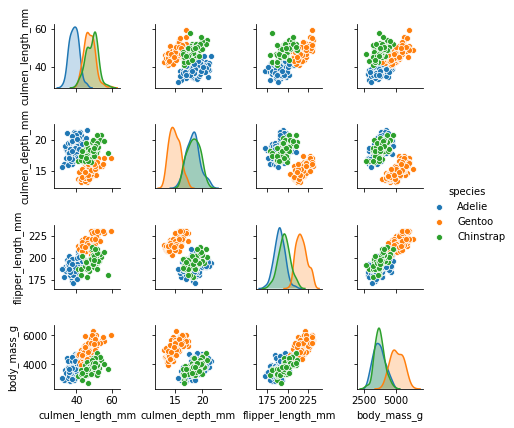

In [3]:
sns.pairplot(df, hue = "species", size = 1.5)

# Let's Get Started: Supervised Learning

## 1) Linear Regression

#### Linear Regression really is the bread-and-butter of predictive modeling, there's no better place to start and much of what's to follow will be much easier to understand with a firm grasp on the properties of Linear Regression. In fact you've almost certainly seen it even if you've never implemented it directly yourself. So what is it? Linear regression is a versitile algorithm that has the ability to be run on a single variable (simple linear regression) or on multiple variables (multiple linear regression). The way it works is by optimizing weights of the variables in order to create a line (mx + b) that will be used to predict output.

#### First, let's import our data and clean it up a bit so we can do some Machine Learning! We're going to focus on Body Mass (g) as a predictor of Flipper Length (mm).

In [4]:
df = pd.read_csv('penguins.csv')
lin_reg_df = df[["body_mass_g", "flipper_length_mm"]]

In [5]:
lin_reg_df.head()

,body_mass_g,flipper_length_mm
0,3750,181
1,3800,186
2,3250,195
3,3450,193
4,3650,190


#### A good rule of thumb is to visualize your data before jumping into any model just to get an idea of what your data looks like.

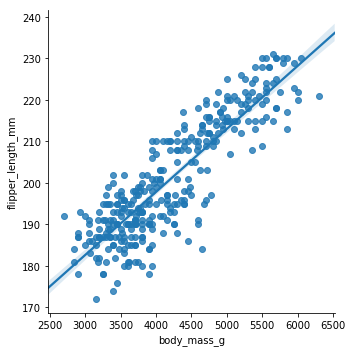

In [6]:
sns.lmplot("body_mass_g", "flipper_length_mm", data = lin_reg_df)

#### So we see a fairly strong, positive correlated relationship between penguin Body Mass (g) and Flipper Length (mm) which makes sense considering we would expect heavier penguins to generally have longer flippers.

### Let's actually perform our Linear Regression:

In [7]:
from sklearn import linear_model

linear = linear_model.LinearRegression()

x_train = np.asarray(lin_reg_df.body_mass_g[20:len(lin_reg_df.body_mass_g)]).reshape(-1, 1)
y_train = np.asarray(lin_reg_df.flipper_length_mm[20:len(lin_reg_df.flipper_length_mm)]).reshape(-1, 1)

x_test = np.asarray(lin_reg_df.body_mass_g[:20]).reshape(-1, 1)
y_test = np.asarray(lin_reg_df.flipper_length_mm[:20]).reshape(-1, 1)

linear.fit(x_train, y_train)
linear.score(x_train, y_train)

print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print('R^2 Value: \n', linear.score(x_train, y_train))

predicted = linear.predict(x_test)

Coefficient: 
 [[0.01500607]]
Intercept: 
 [138.25743067]
R^2 Value: 
 0.7726711866004322


### Interpretting our Results:

#### So what do these terms actually mean? As previously stated, the goal of (simple) Linear Regression is to create a line (mx + b) by optimizing the weights of our variable, in this case Body Mass (g), in order to predict our output variable Flipper Length (mm). So, the equation of our fitted line can be written (in point-slope form) as y = 0.015x + 138.277. The coefficient indicates that for every 1g increase in Body Mass, you can expect Flipper Length to increase by an average of 0.015mm. Our R^2 value is positive which supports our conclusion that an increase in Body Mass generally leads to an increase in Flipper Length and also tells us that our data are relatively close to our fitted line i.e. our model explains 76.9% of the variability of Flipper Length around its mean.

## 2) Logistic Regression

#### Logistic Regression is a supervised *classification* algorithm, meaning that it is useful for estimating discrete values. It is valuable in that it can be used to predict the probability of an event using a logistic function in order to get an output between 0 and 1. Logistic Regression is appropriate when the dependent variable is dichotomous (binary), and much like Linear Regression it can be used to describe the relationship between the binary variable and one or more independent variable. Logistice Regression is an important building block for other Machine Learning techniques that we will see coming up, so don't discount this as some niche form of analysis.

#### First, let's import our data and clean it up a bit so we can do some Machine Learning! We're going to focus on Body Mass (g) as a predictor of Sex.

In [8]:
df = pd.read_csv('penguins.csv')
log_reg_df = df[["body_mass_g", "sex"]]

In [9]:
log_reg_df.head()

,body_mass_g,sex
0,3750,MALE
1,3800,FEMALE
2,3250,FEMALE
3,3450,FEMALE
4,3650,MALE


#### We can see that Sex is obviously a dichotomous (binary) variable here, however, just leaving it as a string of text won't work for us - we're going to have to encode Sex as either a 0 or 1 in order to perform our Logistic Regression. This is a pretty common bit of data cleaning so knowing a simple workaround will be useful on top of learning Logistic Regression.

In [10]:
log_reg_df.sex[log_reg_df.sex == "MALE"] = 1
log_reg_df.sex[log_reg_df.sex == "FEMALE"] = 0

In [11]:
log_reg_df.head()

,body_mass_g,sex
0,3750,1
1,3800,0
2,3250,0
3,3450,0
4,3650,1


#### Like I said before, good rule of thumb is to visualize your data before jumping into any model just to get an idea of what your data looks like.

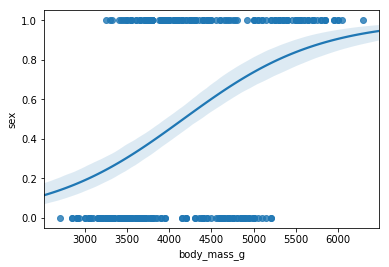

In [12]:
log_reg_df = log_reg_df.convert_objects(convert_numeric = True)
sns.regplot("body_mass_g", "sex", data = log_reg_df, logistic = True)

#### Generally, based on the way in which we re-encoded Sex, it looks like male penguins tend to be heavier than female penguins.

### Let's actually perform our Logistic Regression:

In [13]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

X = (np.asarray(log_reg_df.body_mass_g)).reshape(-1, 1)
Y = (np.asarray(log_reg_df.sex)).ravel()

logistic.fit(X, Y)
logistic.score(X, Y)

print('Coefficient: \n', logistic.coef_)
print('Intercept: \n', logistic.intercept_)
print('R^2 Value: \n', logistic.score(X, Y))

Coefficient: 
 [[0.00081854]]
Intercept: 
 [-3.36246918]
R^2 Value: 
 0.6156156156156156


# NEED TO PUT IN A DESCRIPTION OF WHAT THIS MEANS

## 3) Decision Trees

In [14]:
# https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d

#### This is why this is important...

### Let's use decision trees to determine the species.

In [15]:
from sklearn import tree
new_df = pd.read_csv('penguins.csv')
new_df = df[["species", "culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]]
new_df.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181,3750
1,Adelie,39.5,17.4,186,3800
2,Adelie,40.3,18.0,195,3250
3,Adelie,36.7,19.3,193,3450
4,Adelie,39.3,20.6,190,3650


In [16]:
from sklearn.model_selection import train_test_split

dec = tree.DecisionTreeClassifier(criterion = 'gini')

x = new_df.values[:, 1:4]
y = new_df.values[:, 0]

trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.25)

dec.fit(trainX, trainY)
print('Accuracy: \n', dec.score(testX, testY))

Accuracy: 
 0.9642857142857143


#### What this means is...

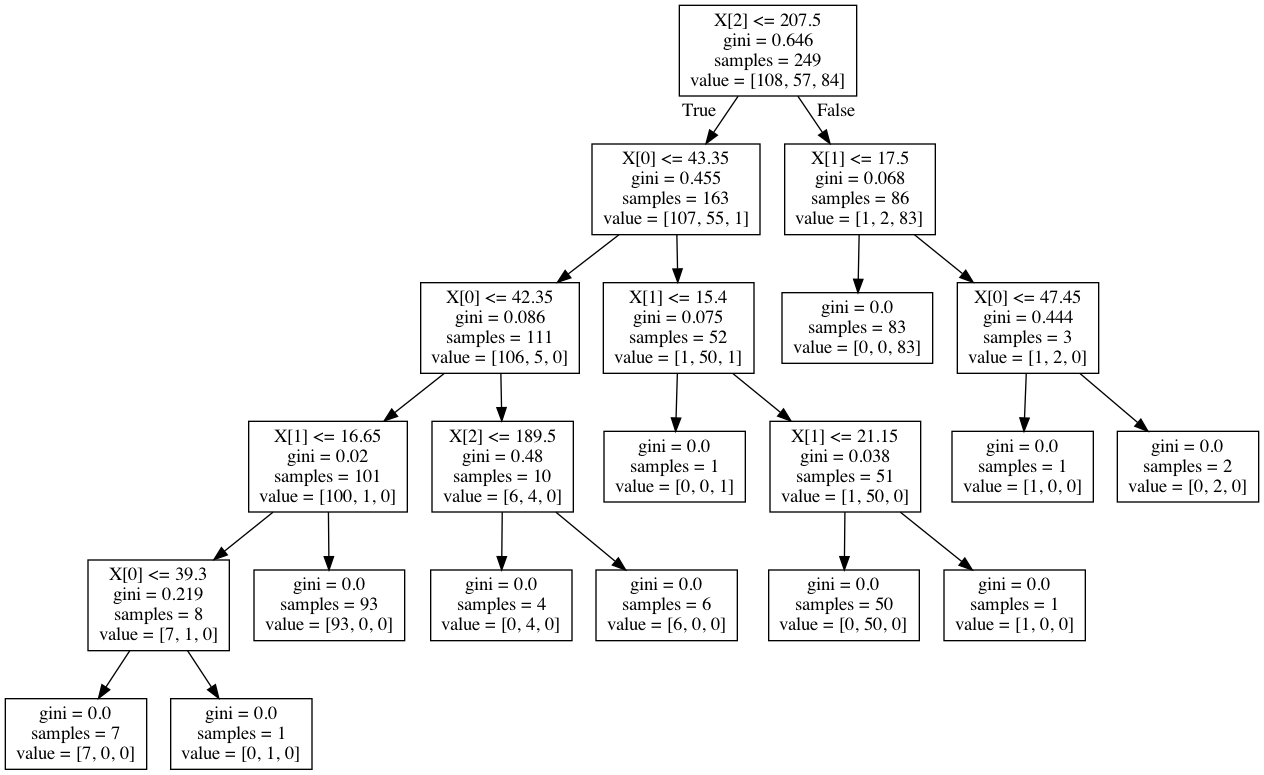

In [17]:
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus as pydot

dot_data = StringIO()
tree.export_graphviz(dec, out_file = dot_data)
graph = pydot.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

## 4) Support Vector Machines

#### This is why this is important...

In [18]:
from sklearn import svm

svm_df = df[["species", "flipper_length_mm", "body_mass_g"]]
svm_df.head()

,species,flipper_length_mm,body_mass_g
0,Adelie,181,3750
1,Adelie,186,3800
2,Adelie,195,3250
3,Adelie,193,3450
4,Adelie,190,3650


In [19]:
from sklearn.model_selection import train_test_split

support = svm.SVC()

x = new_df.values[:, 1:2]
y = new_df.values[:, 0]

trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.25)

support.fit(trainX, trainY)
print('Accuracy: \n', support.score(testX, testY))

preds = support.predict(testX)

Accuracy: 
 0.7738095238095238


Text(0.5, 21.70625000000002, 'Flipper Length (mm)')

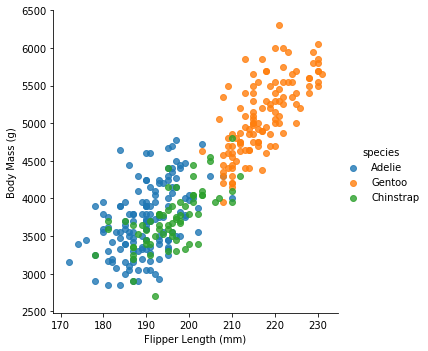

In [20]:
sns.lmplot("flipper_length_mm", "body_mass_g", scatter = True, fit_reg = False, data = svm_df, hue = "species")
plt.ylabel("Body Mass (g)")
plt.xlabel("Flipper Length (mm)")

#### This what this means...

## 5) K-Nearest Neighbors

#### This is why this is important...

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn_df = new_df = df[["species", "culmen_length_mm", "culmen_depth_mm"]]
knn_df.head()

,species,culmen_length_mm,culmen_depth_mm
0,Adelie,39.1,18.7
1,Adelie,39.5,17.4
2,Adelie,40.3,18.0
3,Adelie,36.7,19.3
4,Adelie,39.3,20.6


Text(0.5, 21.70625000000002, 'Culmen Depth (mm)')

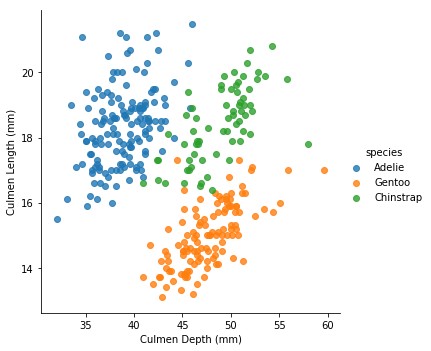

In [22]:
sns.lmplot("culmen_length_mm", "culmen_depth_mm", scatter = True, fit_reg = False, data = knn_df, hue = "species")
plt.ylabel("Culmen Length (mm)")
plt.xlabel("Culmen Depth (mm)")

In [23]:
from sklearn.model_selection import train_test_split

neighbors = KNeighborsClassifier(n_neighbors = 5)

x = knn_df.values[:, 1:2]
y = knn_df.values[:, 0]

trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.25)

neighbors.fit(trainX, trainY)
print('Accuracy: \n', neighbors.score(testX, testY))

preds = neighbors.predict(testX)

Accuracy: 
 0.6785714285714286


#### This is what we can learn from this...

## 6) Random Forests

#### This is what this means...

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf_df = new_df.copy()
rf_df.head()

,species,culmen_length_mm,culmen_depth_mm
0,Adelie,39.1,18.7
1,Adelie,39.5,17.4
2,Adelie,40.3,18.0
3,Adelie,36.7,19.3
4,Adelie,39.3,20.6


In [49]:
from sklearn.model_selection import train_test_split

forest = RandomForestClassifier()

x = rf_df.values[:, 1:4]
y = rf_df.values[:, 0]

trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.25)

forest.fit(trainX, trainY)
print('Accuracy: \n', forest.score(testX, testY))

preds = forest.predict(testX)

Accuracy: 
 0.9285714285714286


#### Need to figure out what the hell happened here...

## 7) Gaussian Naive Bayes

In [26]:
df = pd.read_csv('penguins.csv')
gnb_df = df[["species", "culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]]
gnb_df.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181,3750
1,Adelie,39.5,17.4,186,3800
2,Adelie,40.3,18.0,195,3250
3,Adelie,36.7,19.3,193,3450
4,Adelie,39.3,20.6,190,3650


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

gauss = GaussianNB()

x = gnb_df.values[:, 1:4]
y = gnb_df.values[:, 0]

trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.25)

gauss.fit(trainX, trainY)
print('Accuracy: \n', gauss.score(testX, testY))

preds = gauss.predict(testX)

Accuracy: 
 0.9523809523809523


#### We can see that this simple naive classigication algorithm is effective for this particular data set...

# Let's Keep Going: Unsupervised Learning

### Some words about what that is...

## 8) K-Means Clustering

#### Why this is important...

In [28]:
from sklearn.cluster import KMeans
kmeans_df = svm_df.copy()
kmeans_df.head()

,species,flipper_length_mm,body_mass_g
0,Adelie,181,3750
1,Adelie,186,3800
2,Adelie,195,3250
3,Adelie,193,3450
4,Adelie,190,3650


In [29]:
from sklearn.model_selection import train_test_split

kmeans = KMeans(n_clusters = 3)

x = kmeans_df.values[:, 1:2]
kmeans.fit(x)

kmeans_df['Pred'] = kmeans.predict(x)
kmeans_df.head()

,species,flipper_length_mm,body_mass_g,Pred
0,Adelie,181,3750,0
1,Adelie,186,3800,0
2,Adelie,195,3250,2
3,Adelie,193,3450,2
4,Adelie,190,3650,2


Text(0.5, 21.70625000000002, 'Flipper Length (mm)')

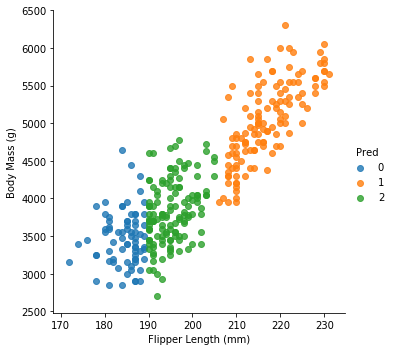

In [30]:
sns.lmplot("flipper_length_mm", "body_mass_g", scatter = True, fit_reg = False, data = kmeans_df, hue = 'Pred')
plt.ylabel("Body Mass (g)")
plt.xlabel("Flipper Length (mm)")

#### What this all means is...

## 9) Principal Component Analysis (PCA)

#### This is what this is...

In [42]:
from sklearn import decomposition
unsup_df = df[["species", "culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]]
unsup_df.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181,3750
1,Adelie,39.5,17.4,186,3800
2,Adelie,40.3,18.0,195,3250
3,Adelie,36.7,19.3,193,3450
4,Adelie,39.3,20.6,190,3650


In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

pca_df_X = unsup_df.values[:, 1:4]
pca_df_y = unsup_df.values[:, 0]

pca.fit(pca_df_X)

X_2D = pca.transform(pca_df_X)

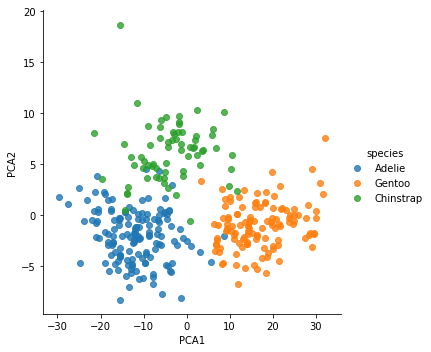

In [44]:
unsup_df['PCA1'] = X_2D[:, 0]
unsup_df['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue = "species", data = unsup_df, fit_reg = False)

#### Wwe see that in the two-dimensional representation, the species are fairly well separated even though the PCA algorithm had no knowledge of the species labels. This indicates that a relatively straightforward classificatino will likely be effective on the data set (like we saw in Gaussian Naive Bayes).

## 10) Gaussian Mixture Model Clustering

#### This is is more powerful version of K-Means clustering which will build off of the Principal Component Analysis we just performed.

In [45]:
from sklearn import mixture
unsup_df.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,PCA1,PCA2
0,Adelie,39.1,18.7,181,3750,-20.605909,0.595493
1,Adelie,39.5,17.4,186,3800,-15.594844,-0.468773
2,Adelie,40.3,18.0,195,3250,-6.779853,-1.906565
3,Adelie,36.7,19.3,193,3450,-9.758777,-4.668310
4,Adelie,39.3,20.6,190,3650,-12.050440,-1.239380


In [47]:
gmm = mixture.GaussianMixture(n_components=3, covariance_type='full')

gmm_df_X = unsup_df.values[:, 1:4]
gmm_df_y = unsup_df.values[:, 0]

gmm.fit(gmm_df_X)

y_gmm = gmm.predict(gmm_df_X)

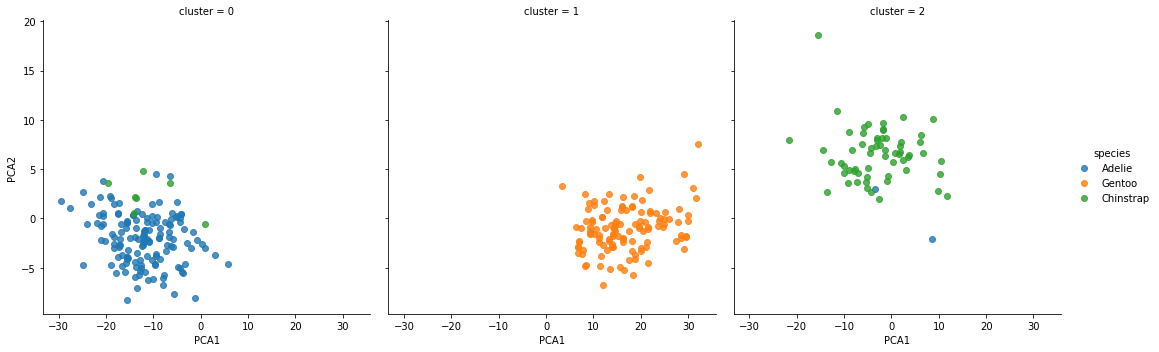

In [48]:
unsup_df['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data = unsup_df, hue = "species", col = 'cluster', fit_reg = False)

#### By splitting the data by cluster number, we can see eaxctly how well the GMM algorithm has recovered the underlying labels: there is some slight mixing of the Adelie and Chisntrap species in cluster 0, the Gentoo species has been separated perfectly into cluster 1, and there is a small amount of mixing between the Chinstrap and Adelie species in cluster 2. This means that the measurements of the Culmen Length, Culmen Depth, Flipper Length, and Body Mass of these penguins are distinct enough to automatically identify the presence of different groups of species with this simple clustering algorithm.